
# LENDING CLUB CASE STUDY

# Problem Statement
<br>

<font color = green >  
The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. 

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

</font> 
<br>

**Identification of such applicants using EDA is the aim of this case study.**

<br>
<font color = green >  
The company wants to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 
    
</font> 
    


## Importing the libraries

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the dataset and check the first five rows**

In [8]:
loan_df = pd.read_csv('../loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Check the shape of the dataframe**

In [10]:
print(loan_df.shape)

(39717, 111)


In [11]:
loan_df.info(max_cols = 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# Data Understanding

- Aim of the Analysis of this loan dataset is find out the factors influencing a loan to be default.
- The dataset has the details of the past loan applicants and whethe r they resulted in good loan or bad loan.
- Loan Status is the Target variable.
- Column Loan_status has 3 values:
>'Fully Paid' <br>
> 'Charged Off' <br>
> 'Current' <br>

Since we are not sure about 'Current' customers whether they will default or fully pay at the end of the tenure, we will filter out 'Current' customers and will only consider 'Fully Paid' and 'Charged Off' values. Here **charged off means defaulters**

- Many columns which have NA values need to be removed 

**Missing Value Treatment**

In [12]:
#Calculate missing value %
df_null_percent = loan_df.isnull().sum()/len(loan_df)*100
df_null_percent.sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [13]:
#Filter columns with more than or equal to 50% missing values which will be our threshold to drop the columns
loan_df = loan_df.loc[:,df_null_percent<50]

In [14]:
# print shape of the dataframe
loan_df.shape

(39717, 54)

In [15]:
loan_df.info(max_cols = 54)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

**The customer behavior variables are not available at the time of
loan application, and thus they cannot be used as predictors for
credit approval**

In [16]:
# List the coumns which are not required for the analysis. Total 21 columns
list_drop_col1 = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [17]:
# Drop the coumns which are not required for the analysis. Total 21 columns
loan_df.drop(list_drop_col1,axis=1,inplace = True)

In [18]:
#Observer the shape after dropping the columns
loan_df.shape

(39717, 33)

**Drop columns with single value as these will not be helpful in the analysis**

In [19]:
#Observe columns having single value
num_unique = loan_df.nunique()   #This function is a method used to return the number of unique elements in a pandas object.
num_unique.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

In [20]:
%%time
loan_df.chargeoff_within_12_mths.unique()

CPU times: user 402 µs, sys: 137 µs, total: 539 µs
Wall time: 285 µs


array([ 0., nan])

In [21]:
#print columns with single value
list_col_unique_val = num_unique[num_unique.values==1]
print(list_col_unique_val)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [22]:
# List of Columns to be dropped
list_col_unique_val.index.tolist()

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [23]:
#Drop columns having single value
list_drop_col2=list_col_unique_val.index.tolist()
loan_df.drop(list_drop_col2,axis=1,inplace = True)
loan_df.shape

(39717, 25)

**Drop columns which does not add any value to analysis.**
- id 
-member_id
-url
-desc
-zip_code

In [24]:
#drop columns which does not add any value to analysis and observe the shape
list_drop_col3 = ["id", "member_id", "url", "desc","zip_code"]
loan_df.drop(list_drop_col3,axis=1,inplace = True)
loan_df.shape

(39717, 20)

**Taking loan_status equal to "Charged Off" and "Fully Paid" as if the loan_status is "Current" we might not know whether they will turn in fully paid or will they be charged off**

In [25]:
#observe the count of loan_status values
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [26]:
#consider subset with values "Fully Paid" and "Charged Off" and observe the shape
loan_df = loan_df[loan_df.loan_status.isin(["Fully Paid","Charged Off"])]
loan_df.shape

(38577, 20)


- Check for rows with more than 50% of missing values and drop them

In [27]:
#print rows with null values in descending order
loan_df.isnull().sum(axis=1).sort_values(ascending=False)


28700    3
3297     2
18511    2
18729    2
18722    2
        ..
16008    0
16007    0
16006    0
16005    0
20428    0
Length: 38577, dtype: int64

In [28]:
#calculate percentage of null values across rows
df_missing_val_row = loan_df.isnull().sum(axis=1)/loan_df.shape[1]*100
print(df_missing_val_row.sort_values(ascending=False))

28700    15.0
3297     10.0
18511    10.0
18729    10.0
18722    10.0
         ... 
16008     0.0
16007     0.0
16006     0.0
16005     0.0
20428     0.0
Length: 38577, dtype: float64


In [29]:
#Identify rows with missing values greater than or equal to 50%
df_missing_val_row[df_missing_val_row>=50]

Series([], dtype: float64)

**Note** 
<font color = red >There are no rows with missing values >=50% Hence no need to drop any rows </font>

**Sanity Checks**


In [30]:
#drop rows if "funded_amnt_inv" is greater than "loan_amnt"
loan_df[loan_df.funded_amnt_inv > loan_df.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies


In [31]:
loan_df.info(max_cols = 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

**Analysis:** <font color = green> There are no rows with "funded_amnt_inv" is greater than "loan_amnt".
<font>

**Missing Value Imputation**

In [32]:
#Observe columns with null values
null_val = loan_df.isnull().sum()* 100 /loan_df.shape[0]
null_val[null_val.values>0]

emp_title               6.185033
emp_length              2.677761
title                   0.028514
pub_rec_bankruptcies    1.806776
dtype: float64

In [33]:
#Treating missing values for emp_title
loan_df["emp_title"].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [34]:
#calculate mode
loan_df  ["emp_title"].mode()

0    US Army
Name: emp_title, dtype: object

**Analysis: We Can replace missing values of "emp_title" with mode, but it won't create much sense so will go ahead without the imputation**

In [35]:
#Drop column emp_title
loan_df.drop(["emp_title"],axis=1,inplace = True)
loan_df.shape

(38577, 19)

In [36]:
#Treating missing values for emp_length
loan_df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

**Analysis: After observing the values of emp_length it seems that absence of value means the employee is not working for any firm but must be running a business. Hence we can impute the missing value by "Self Employed".**


In [37]:
#Replace null with "Self Employed"
loan_df["emp_length"] = loan_df["emp_length"].fillna("Self Employed")
loan_df["emp_length"].isnull().sum()

0

In [38]:
#Observe values for title column
loan_df.title.value_counts()


Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [39]:
#Drop column title as it has lot of different values so wont be useful 
loan_df.drop(["title"],axis=1,inplace = True)
loan_df.shape


(38577, 18)

In [40]:
#Treating missing values for pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [41]:
#Filter rows with nonnull values of pub_rec_bankruptcies
loan_df = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]
loan_df.shape

(37880, 18)

### Handling Data Types

In [42]:
#Observe the data
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [43]:
#Observe data types
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [44]:
#Convert "funded_amnt_inv" to int64
print(loan_df.funded_amnt_inv.dtype)
loan_df.funded_amnt_inv = loan_df.funded_amnt_inv.astype("int64")
print(loan_df.funded_amnt_inv.dtype)

float64
int64


In [45]:
#Convert "annual_inc" to int64
print(loan_df.annual_inc.dtype)
loan_df.annual_inc = loan_df.annual_inc.astype("int64")
print(loan_df.annual_inc.dtype)

float64
int64


In [46]:
#Convert "pub_rec_bankruptcies" to int64
print(loan_df.pub_rec_bankruptcies.dtype)
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype("int64")
print(loan_df.pub_rec_bankruptcies.dtype)


float64
int64


In [47]:
#Convert "issue_d" to Datetime
print(loan_df.issue_d)
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format = '%b-%y')
print(loan_df.issue_d)
print(loan_df.issue_d.dtype)

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39562    Nov-07
39573    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 37880, dtype: object
0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 37880, dtype: datetime64[ns]
datetime64[ns]


In [48]:
#Convert "term" to "int64" after removing " months" string
print(loan_df.term)
loan_df.term = loan_df.term.str.replace(" months",'').astype('int64')
print(loan_df.term)
print(loan_df.term.dtype)

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39562     36 months
39573     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 37880, dtype: object
0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 37880, dtype: int64
int64


In [49]:
#Convert "int_rate" to "float64" after removing "%" symbol.
print(loan_df.int_rate)
loan_df.int_rate = loan_df.int_rate.str.replace("%",'').astype('float64')
print(loan_df.int_rate)


0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 37880, dtype: object
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37880, dtype: float64


In [50]:
#Observe values of emp_length and Remove "+".
loan_df.emp_length.value_counts()


10+ years        8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: emp_length, dtype: int64

In [51]:
#remove '+'
loan_df.emp_length = loan_df.emp_length.str.replace("+",'')
loan_df.emp_length.value_counts()


10 years         8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: emp_length, dtype: int64

In [91]:
## Data Cleaning and Manipulation
Data Quality Issues can:
-  Missing Values : We can Drop the columns containing maximum null values and also Drop columns which does not add any value to analysis.
-  Sanity Checks : We can check for data inconsistencies
- Small % of Missing Value can be Imputed : If categorical can be imputed by mode or if continuous if suitable we can go for Mean/median
- Modifing the Data Types : Converting the some string columns to numeric variables in order to perform more analysis.
- Outliers Treatment is necessary for correct analysis


SyntaxError: invalid syntax (2425854620.py, line 2)

# Data Cleaning and Manipulation
Data Quality Issues can:
-  Missing Values : We can Drop the columns containing maximum null values and also Drop columns which does not add any value to analysis.
-  Sanity Checks : We can check for data inconsistencies
- Small % of Missing Value can be Imputed : If categorical can be imputed by mode or if continuous if suitable we can go for Mean/median
- Modifing the Data Types : Converting the some string columns to numeric variables in order to perform more analysis.
- Outliers Treatment is necessary for correct analysis

### Treating Outliers

In [52]:
#Observe basic statistical details about the dataset
loan_df.annual_inc.describe()

count    3.788000e+04
mean     6.876386e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

**Remove outliers based on annual_inc**

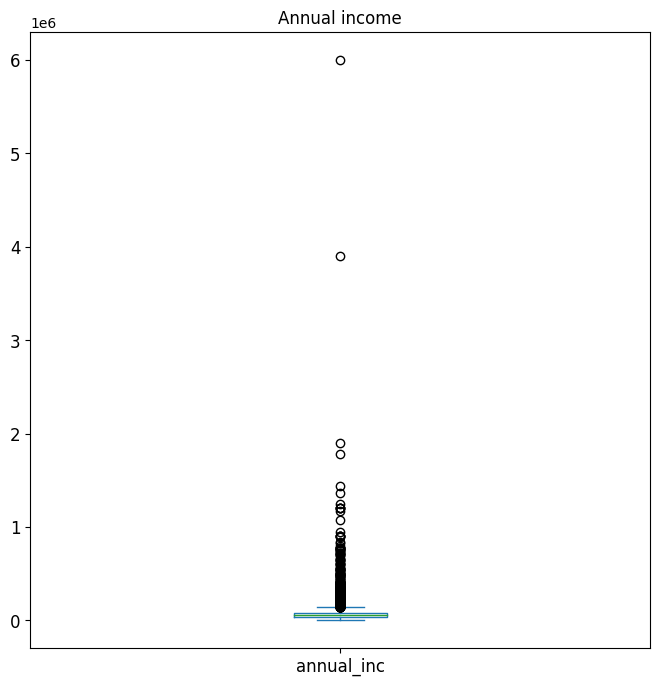

In [53]:
#Plot boxplot to observe the outliers
loan_df.annual_inc.plot.box(fontsize = 12, figsize = (8,8)).set(title='Annual income')
plt.show()


In [54]:
#Observe Quantiles
quantiles = loan_df.annual_inc.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)


0.01     14400.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.99    234000.0
Name: annual_inc, dtype: float64


In [55]:
#Remove outliers
df_final = loan_df[(loan_df.annual_inc > 14400) & (loan_df.annual_inc<234144)]


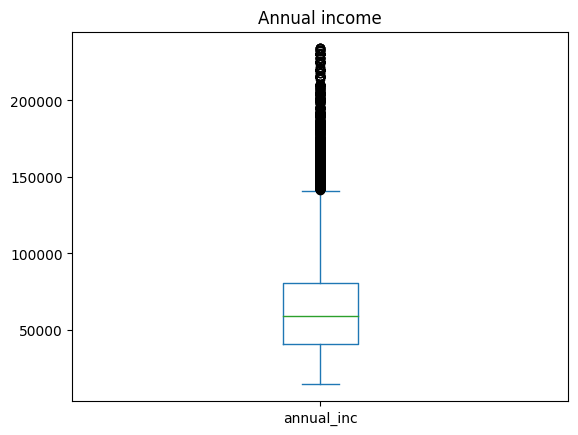

In [56]:
#Plot boxplot from new dataset after removing obvious outliers
df_final.annual_inc.plot.box().set(title='Annual income')
plt.show()

In [57]:
#Final dataset after data cleaning and data handling
df_final.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10 years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0
1,2500,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10 years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0
6,7000,7000,7000,60,15.96,170.08,C,C5,8 years,RENT,47004,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0


# Data Analysis


**Derived metrics for Month and Year from column "issue_d"**

In [58]:
#Derived metrics analysis on column "issue_d"
df_final["year"] = df_final.issue_d.dt.year
df_final["month"]=df_final.issue_d.dt.month


In [59]:
df_final[["issue_d","month","year"]].head()

,issue_d,month,year
0,2011-12-01,12,2011
1,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011
6,2011-12-01,12,2011


In [60]:
#Create new column loan_status_code with 0 and 1 values based on loan_status column where 0="Charged Off" and 1="Fully Paid"
loan_status_map = {'Charged Off':1,'Fully Paid':0 }
df_final["loan_status_code"] = df_final["loan_status"].map(loan_status_map)
print(df_final["loan_status_code"])

0        0
1        1
3        0
5        0
6        0
        ..
39562    0
39573    0
39623    1
39666    1
39680    0
Name: loan_status_code, Length: 37095, dtype: int64


In [61]:
df_final.loan_status.value_counts()

Fully Paid     31728
Charged Off     5367
Name: loan_status, dtype: int64

In [62]:
#Creating different groups for interest rate
#Int_rate is between 5% to 25%, grouping them accordingly
df_final.int_rate.describe

<bound method NDFrame.describe of 0        10.65
1        15.27
3        13.49
5         7.90
6        15.96
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37095, dtype: float64>

In [63]:
#Treating for int_rate
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']

In [64]:
df_final['int_rate_group'] = pd.cut(df_final['int_rate'], bins=bins,
                               labels=labels)

df_final['int_rate_group'].value_counts()

9%-13%     13469
13%-17%    10680
5%-9%       9486
17%-21%     3134
21%-25%      326
Name: int_rate_group, dtype: int64

In [65]:
#Treating for annual_income
bins = [ 14400, 25000, 50000, 100000,150000,234000]
labels = ['14k-25k','25k-50k','50k-100k','100k-150k','150k-250k']

df_final['annual_inc_group'] = pd.cut(df_final['annual_inc'], bins=bins,
                               labels=labels)
df_final['annual_inc_group'].value_counts()

50k-100k     17424
25k-50k      12599
100k-150k     3925
14k-25k       2066
150k-250k     1081
Name: annual_inc_group, dtype: int64

## Univariate Analysis
(P.S. - The plot function reference is taken from a kaggle notebook on EDA)

In [66]:
#define a function to attach values with each bar
def label(ax,x):
    """
    Attach a text label above each bar displaying its height
    """
    for p in ax.patches:
        ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+x, p.get_height()+10))

In [67]:
#define function to plot countplot for categorical variables
def cat(df, col_name):
    fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)
    sns.countplot(x=col_name, data=df_final[df_final.loan_status=="Charged Off"], order = df[col_name].value_counts().index)
    ax.set_xlabel(col_name)
    ax.set_ylabel('No of loans')
    ax.set_title('Plot of ' + col_name, weight='bold')
    plt.xticks(rotation=90)
    label(ax,0.01)
    plt.show()
    

In [68]:
#define function to plot countplot for numerical variables
def num(df, col_name):
    fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.distplot(a=df[col_name], rug=True,    color='#388E3C')
    plt.subplot(1,2,2)
    sns.boxplot(data=df[col_name], color='#388E3C')
    plt.suptitle('Distribution of '+ col_name)
    label(ax,0.01)
    plt.show()

**grade, sub_grade, term, emp_length, issue_y, issue_m**

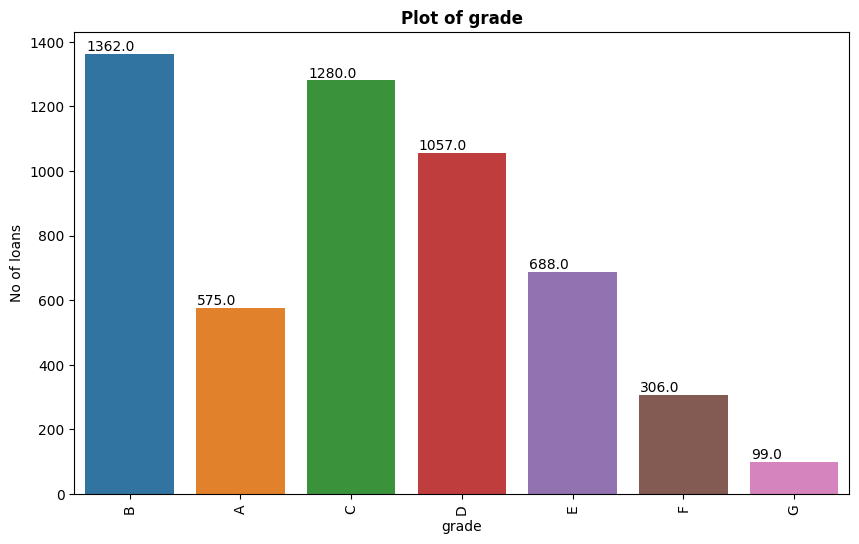

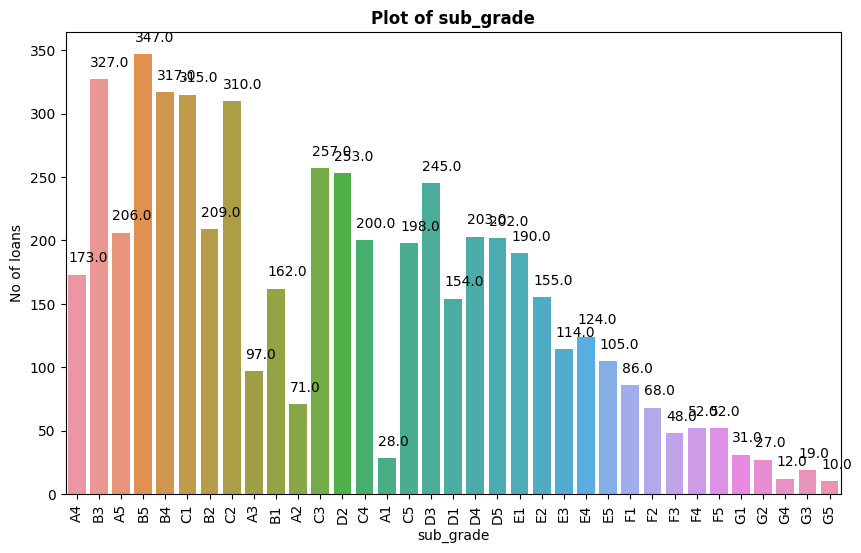

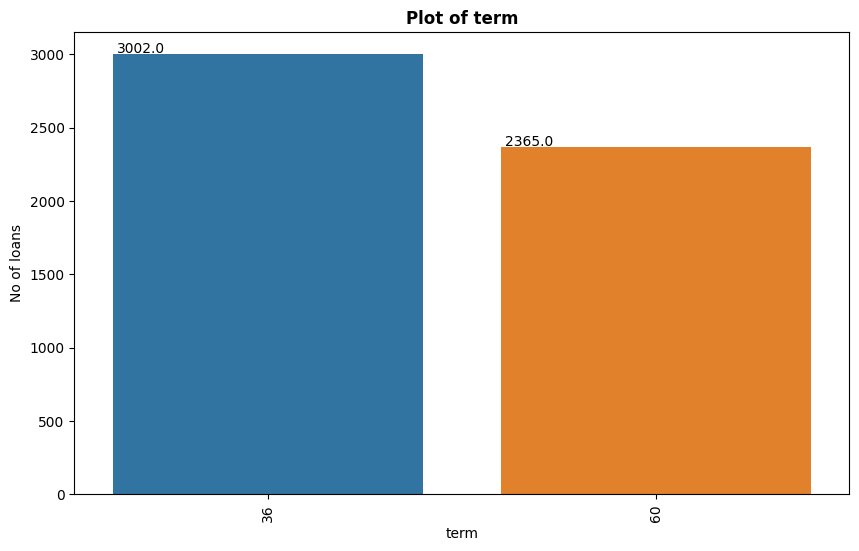

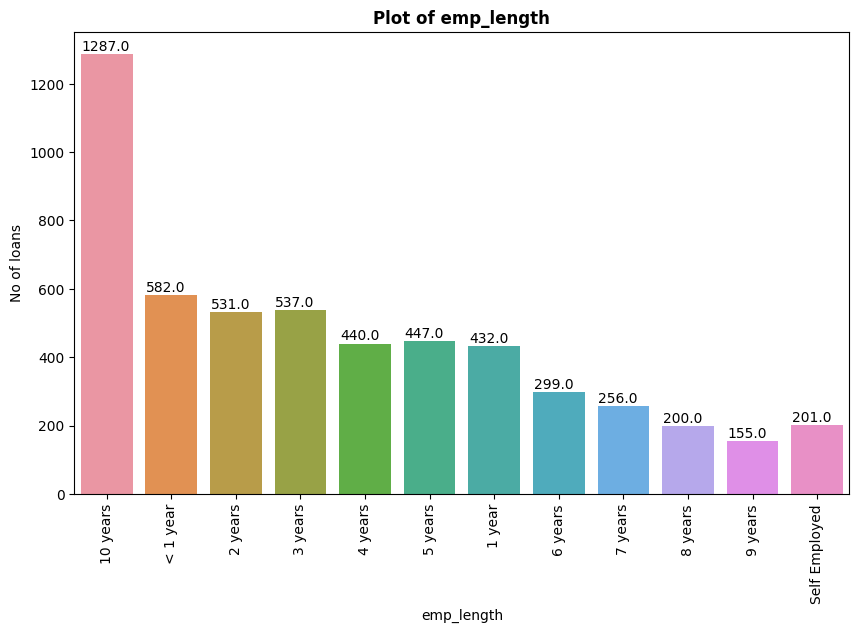

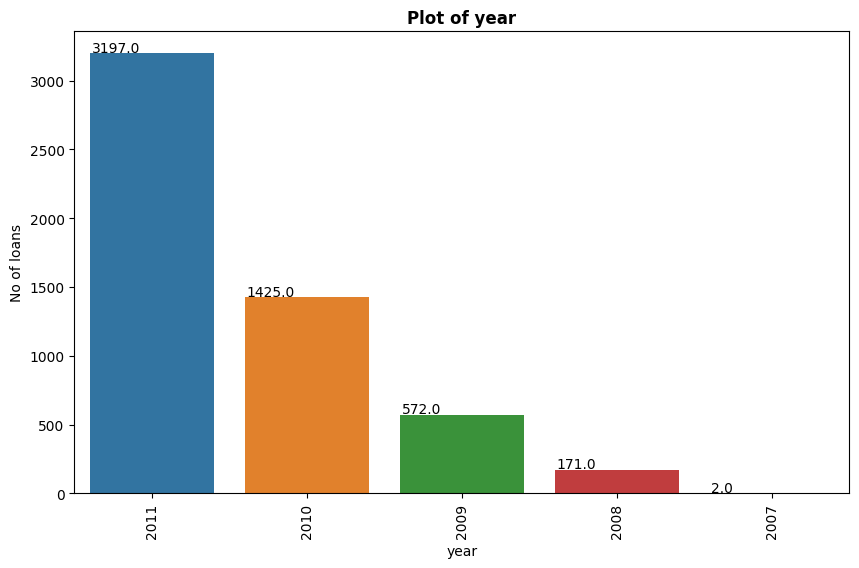

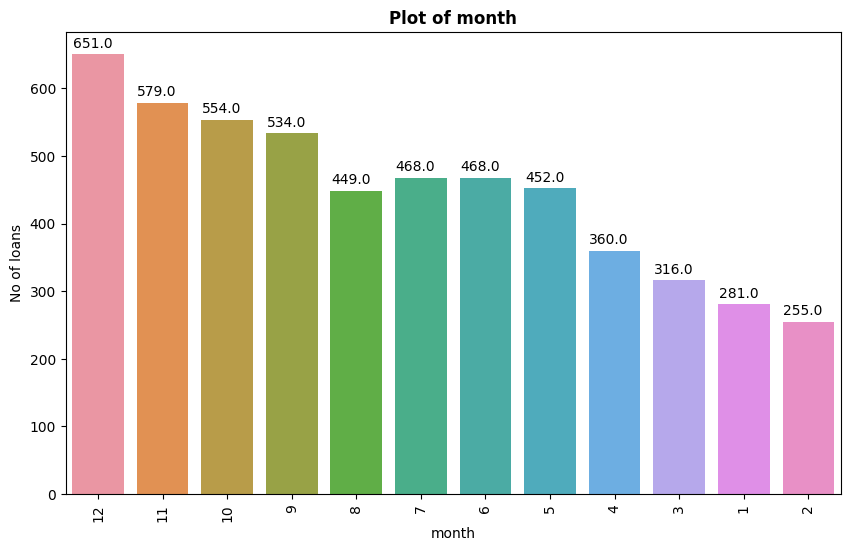

In [69]:
#countplot for "grade", "sub_grade","term","emp_length","issue_y","issue_m" for Charged off
for factor in ["grade", "sub_grade","term","emp_length","year","month"]:
    cat(df_final, factor)
    

- Count Plot of **Grade** shows Grade B ,C, D are given more likely to charged off as compared to other grades
- Count Plot of **Sub Grade** shows Grade  B3, B5, B4, C1 , C2 have charged off more as compared to other grades
- Count Plot of **term** shows 36 months loans are issued more so defaulted more compared to 60 months loan
- Count Plot of **emp_length** shows employees with 10 years have more defaulted on loan compared with lesser experience
- Count Plot of issue **year** shows the no. of defaulted loans have increased in the year 2011. The trend is increasing with the increase in the year
- Count Plot of issue **month** shows there is increasing trend in number of defaults with increase in the months. More defaults can be seen in the month of October, November, December.

 **loan_status**

<Axes: xlabel='loan_status', ylabel='count'>

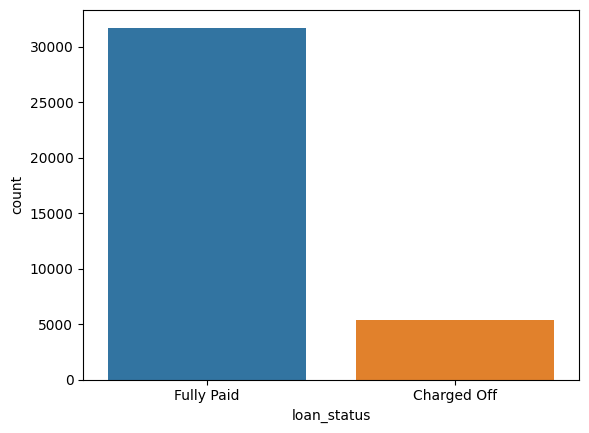

In [70]:
sns.countplot(x = 'loan_status', data = df_final)


- This shows that 14% of total loans are charged off.

**Doing Univariant Analysis for addr_state, purpose, home_ownership**

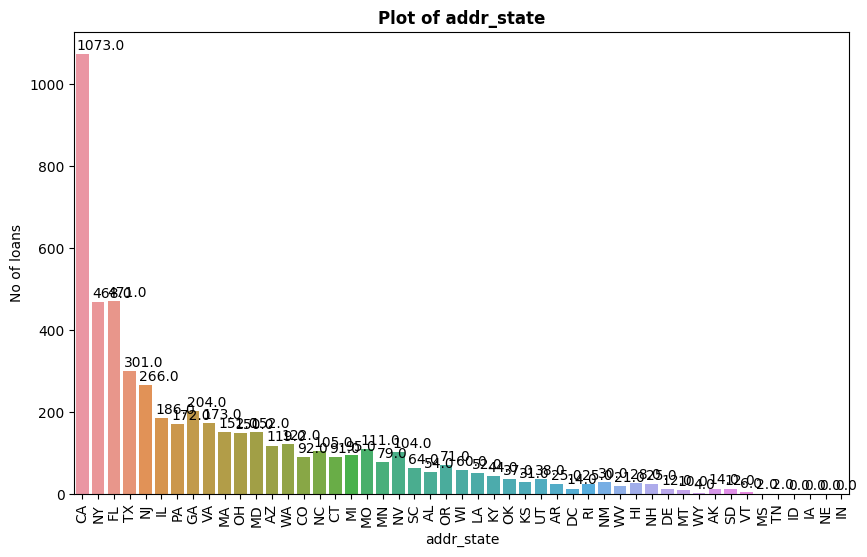

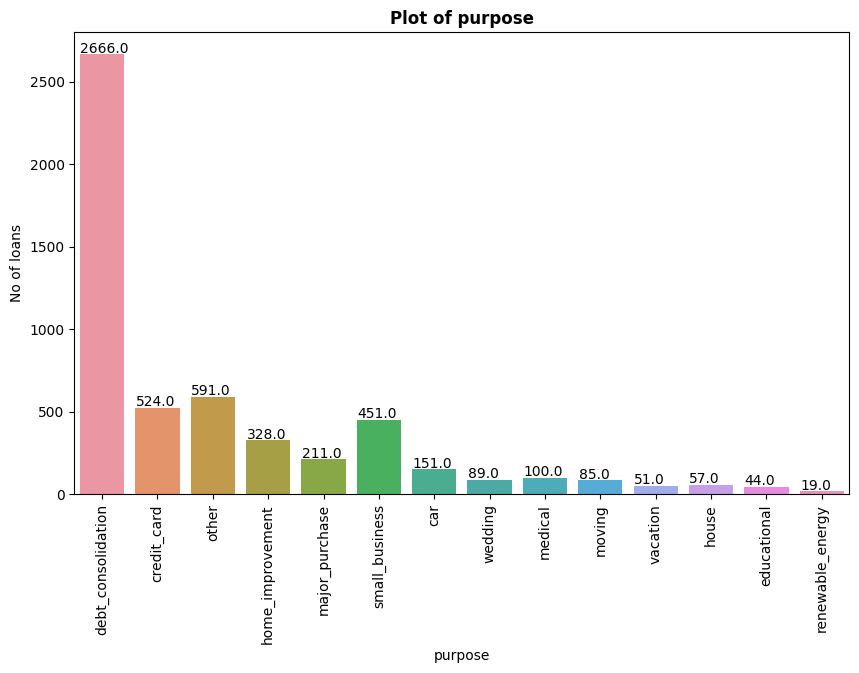

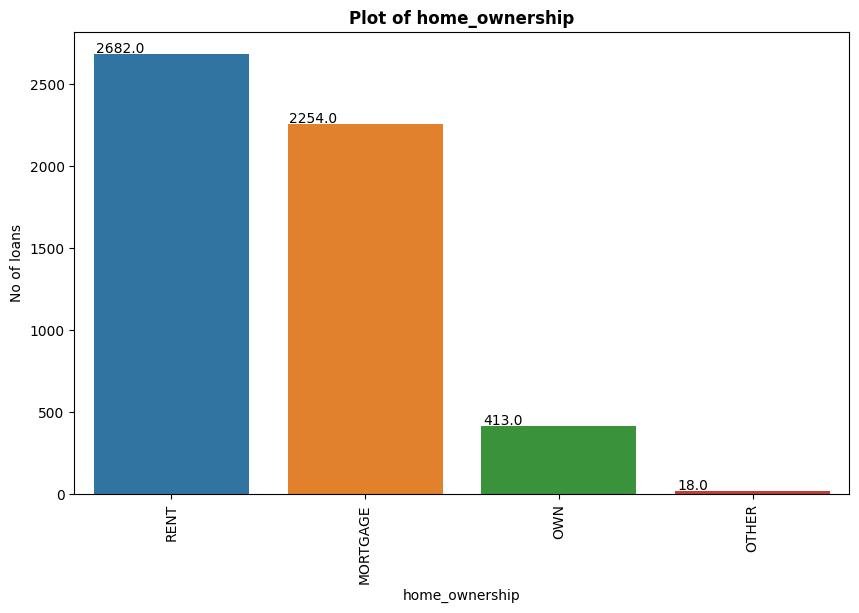

In [71]:
#Plot countplot for "addr_state", "purpose","home_ownership"
for factor in ["addr_state", "purpose","home_ownership"]:
    cat(df_final, factor)


- States CA, NY, FL and TX are the states for which maximum loan defaults
- Maximum loan defaults are for debt consolidation, paying off Credit card, small business and 'other' reasons
- Education and renewable energy is the least category where loans are defaulted
- People who are in Rented house or Mortgate are more likely to Default

**funded_amnt, installment, amnt_to_inc_ratio**

Text(0.5, 0.98, 'Distribution of funded_amnt')

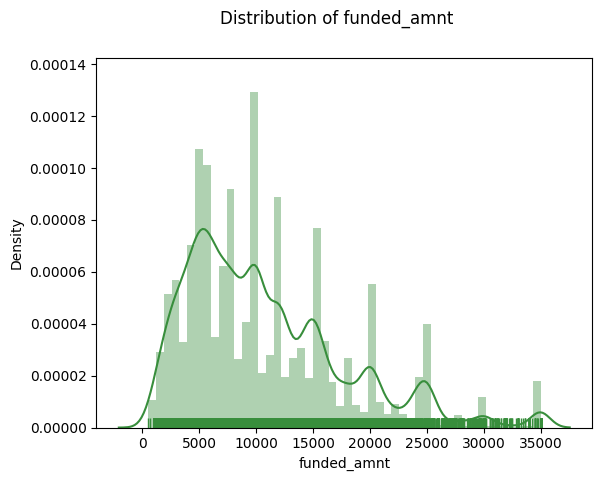

In [72]:
#Plot distplot for "funded_amnt","installment","amnt_to_inc_ratio"
sns.distplot(a=df_final["funded_amnt"], rug=True,    color='#388E3C')
plt.suptitle('Distribution of funded_amnt')

Text(0.5, 0.98, 'Distribution of installment')

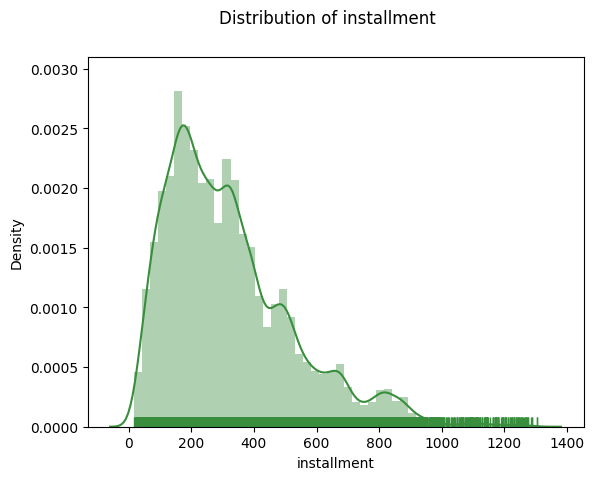

In [73]:
sns.distplot(a=df_final["installment"], rug=True,    color='#388E3C')
plt.suptitle('Distribution of installment')


- Funded amount is ranging from 5000 to 15000 
- Installment amount is ranging from 200 to 400

**Segmented Univariate Analysis**
- int_rate_group

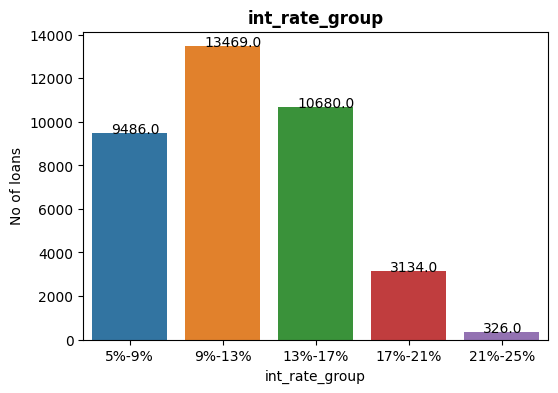

In [74]:
#Countplot of int_rate_group
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='int_rate_group', 
              data=df_final)
 
ax.set_xlabel('int_rate_group')
ax.set_ylabel('No of loans')

ax.set_title('int_rate_group', weight='bold')
label(ax,0.20)

plt.show()


- Interest rate range 9 to 13 is the range where maximum loans have been issued
- 21 - 25% is the range where minimum loans have been issued


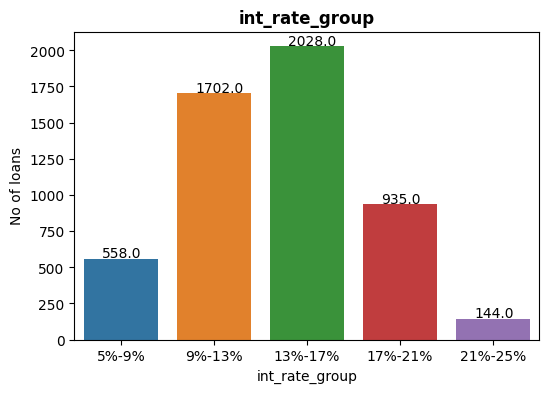

In [75]:
# Observing the same above graph for charged off
#Countplot of int_rate_group for charged off
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='int_rate_group', 
              data=df_final[df_final.loan_status=="Charged Off"])
 
ax.set_xlabel('int_rate_group')
ax.set_ylabel('No of loans')

ax.set_title('int_rate_group', weight='bold')
label(ax,0.20)

plt.show()


. Interest rate range 13% - 17% is the range with maximum loan defaults
- 21 - 25% is the range where minimum loan defaults can be observed from the above plot 

**But considering above 2 plots we come to a conclusion that**
> If we notice the % of defaults in each groups we can state that the interest range 21%-25% has maximum chances of defaults (as high as 44%)  
P.S. (Percent here means no. of charged off divided by the total no. of loan issues in a particular interest rate group)

### Observations from univariate analaysis

- Count Plot of **Grade** shows Grade B ,C, D are given more likely to charged off as compared to other grades
- Count Plot of **Sub Grade** shows Grade  B3, B5, B4, C1 , C2 have charged off more as compared to other grades
- Count Plot of **term** shows 36 months loans are issued more so defaulted more compared to 60 months loan
- Count Plot of **emp_length** shows employees with 10 years have more defaulted on loan compared with lesser experience
- Count Plot of issue **year** shows the no. of defaulted loans have increased in the year 2011. The trend is increasing with    the increase in the year
- Count Plot of issue **month** shows there is increasing trend in number of defaults with increase in the months. More defaults   can be seen in the month of October, November, December.
- States CA, NY, FL and TX are the states for which maximum loan defaults
- Maximum loan defaults are for debt consolidation, paying off Credit card, small business and 'other' reasons
- Education and renewable energy is the least category where loans are defaulted
- People who are in Rented house or Mortgate are more likely to Default- Funded amount is ranging from 5000 to 15000 USD
- Installment amount is ranging from 200 to 400 USD
- Interest rate range 9 to 13 is the range where maximum loans have been issued
- 21 - 25% is the range where minimum loans have been issued
**Observation**
. Interest rate range 13% - 17% is the range with maximum loan defaults
- 21 - 25% is the range where minimum loan defaults can be observed from the above plot 

**But considering above 2 plots we come to a conclusion that**
> If we notice the % of defaults in each groups we can state that the interest range 21%-25% has maximum chances of defaults (as high as 44%)  
P.S. (Percent here means no. of charged off divided by the total no. of loan issues in a particular interest rate group)

## Bivariate Analysis


**Grade vs Loan Staus**

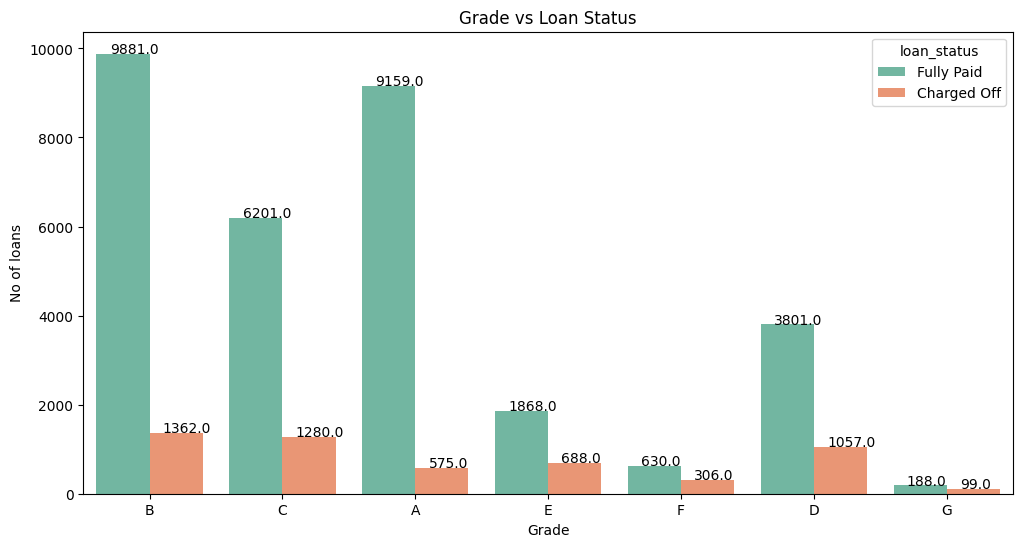

In [76]:
#Countplot of Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='grade', hue="loan_status", 
              data=df_final, 
              palette = "Set2")

ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

label(ax,0.1)
ax.set_title('Grade vs Loan Status')

plt.show()


- The counts of Grade B, C and D are highest in Charged Off

**Sub Grade vs Loan Staus**

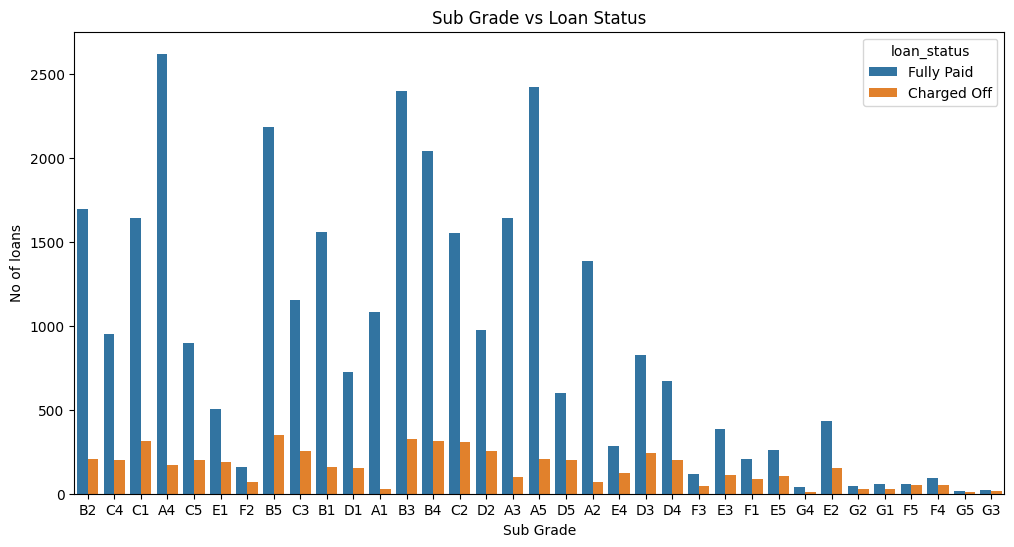

In [77]:
#Countplot of Sub Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='sub_grade', hue="loan_status", 
              data=df_final)

ax.set_xlabel('Sub Grade')
ax.set_ylabel('No of loans')

ax.set_title('Sub Grade vs Loan Status')

plt.show()


- The counts of B3,B4,B5, C1,C2, D3 sub grades are higher in Charged Off

**Term vs Loan Staus**

Text(0.5, 1.0, 'Term vs Loan Status(Charged off)')

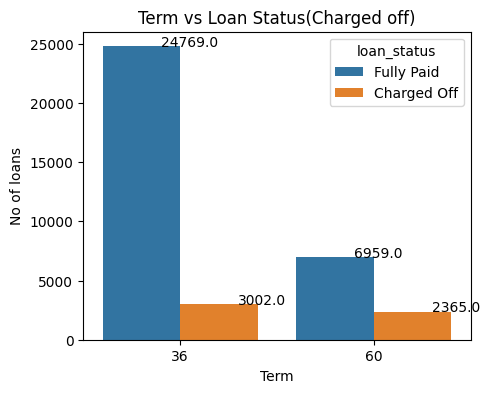

In [78]:
#Countplot of Term vs Loan Status
fig, ax = plt.subplots(figsize=(5,4)  , dpi=100)
sns.countplot(x='term',  hue="loan_status", 
              data=df_final)
                  
ax.set_xlabel('Term')
ax.set_ylabel('No of loans')

label(ax,0.30)
ax.set_title('Term vs Loan Status(Charged off)')


- Though 36 month loan default is more compared to 60 month 
- What is observed is if we see the % of charged off in 36 months it would be 10% of the total loans of 36 months tenure.
- Also if we calculate % charged off in 60 months it is 25% of the total loans issued with a 60 months which is much higher as compared to 36 month tenure so it is more likely for a 60 months loan issued to be a default 

**Employment Length vs Loan Staus**

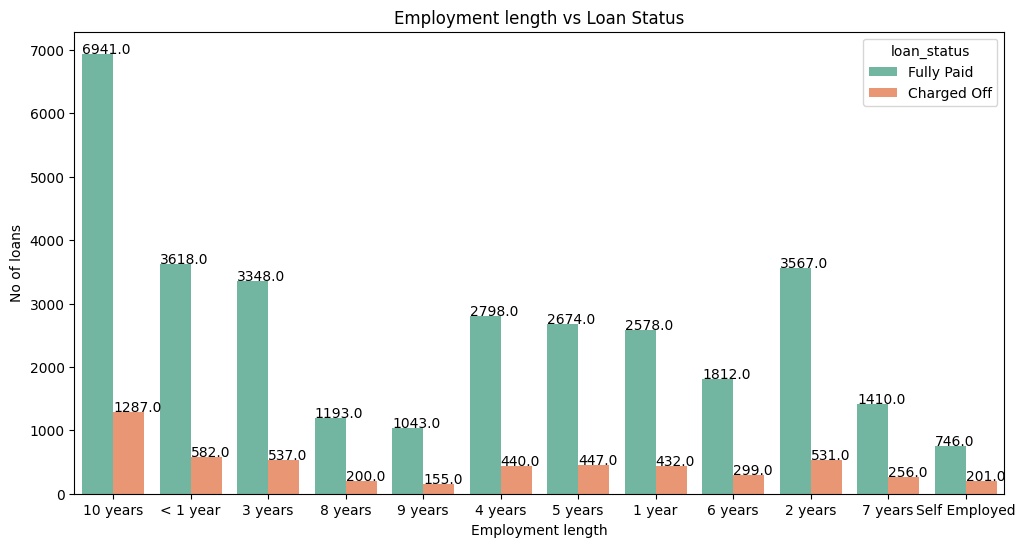

In [79]:
#Countplot of Employment Length vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='emp_length', hue="loan_status", 
              data=df_final, 
              palette = "Set2")
              
    
ax.set_xlabel('Employment length')
ax.set_ylabel('No of loans')

ax.set_title('Employment length vs Loan Status')
label(ax,0.001)


- Maximum loans are issued for people having 10 years of emp_lenth and hence the no. of defaulters are also high

**Loan Issue Year vs Loan Status**

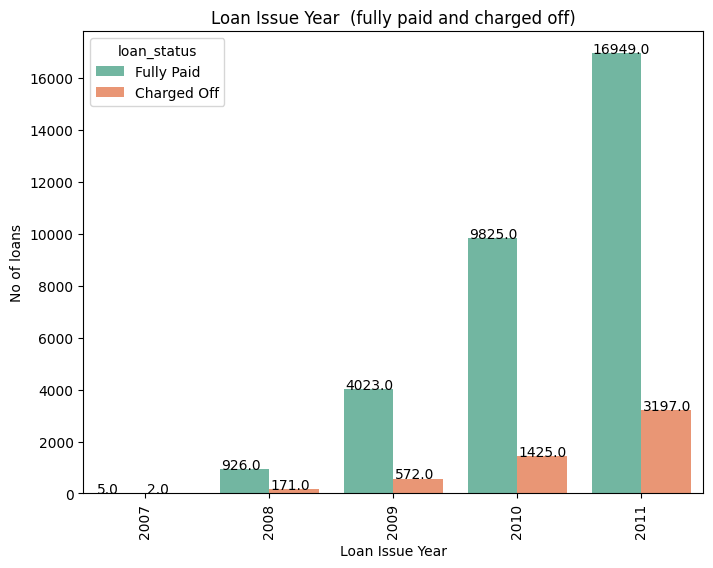

In [80]:
#Countplot of Loan Issue Year vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='year',
              data=df_final, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Year')
ax.set_ylabel('No of loans')
label(ax,0.01)
ax.set_title('Loan Issue Year  (fully paid and charged off)')

plt.show()



- Plot of loan issue year shows maximum loans were taken in the year 2011
- Also high loans are being Charged Off in 2011

**Loan Issue Month vs Loan Status**

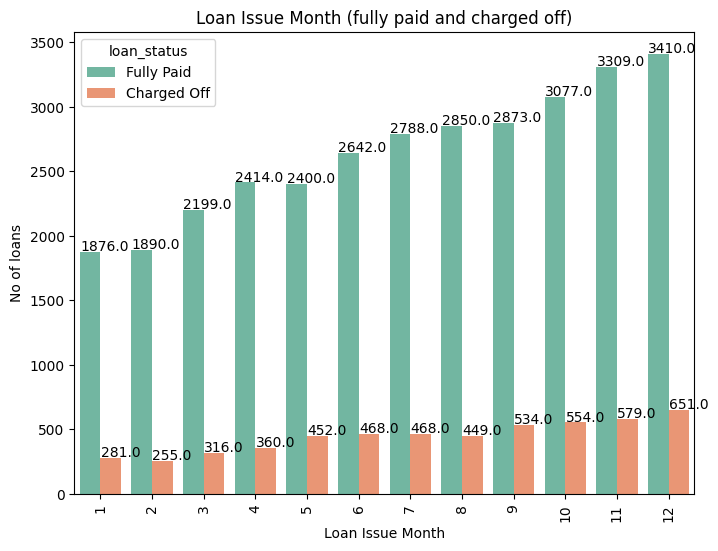

In [81]:
#Countplot of Loan Issue Month vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='month',
              data=df_final, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Month')
ax.set_ylabel('No of loans')

label(ax,0.01)
ax.set_title('Loan Issue Month (fully paid and charged off)')

plt.show()


- high loans are Charged Off for the loans issued in Sep - Dec months

 **Purpose vs Loan Staus**

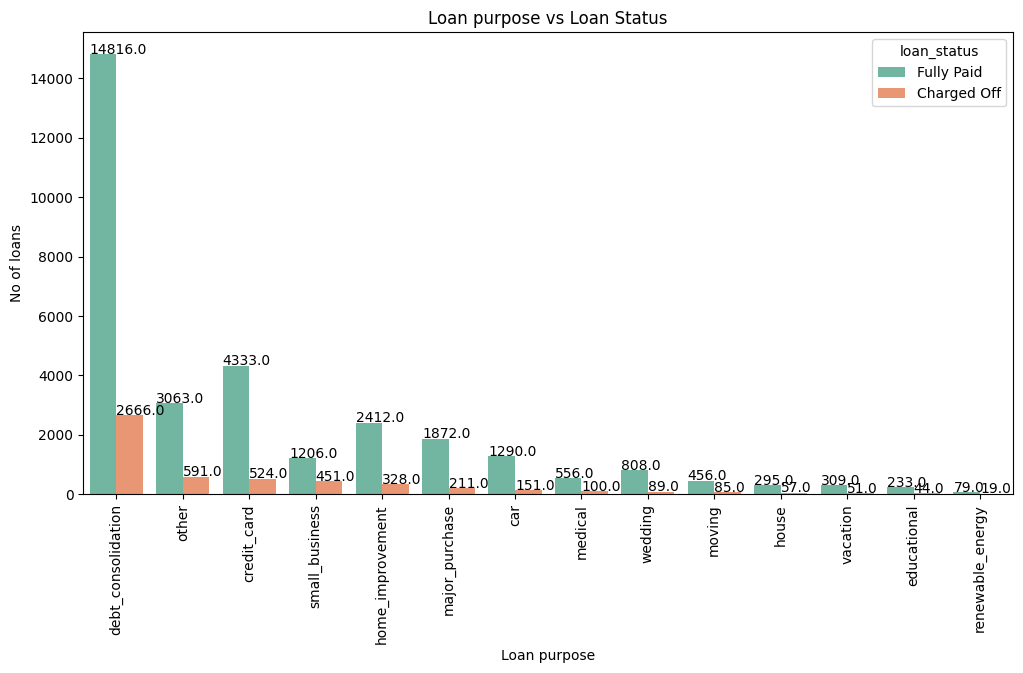

In [82]:
#Countplot of Purpose vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='purpose', hue="loan_status", 
              data=df_final, 
              palette = "Set2", 
              order = df_final[df_final.loan_status=="Charged Off"].purpose.value_counts().index)

ax.set_xlabel('Loan purpose')
ax.set_ylabel('No of loans')

ax.set_title('Loan purpose vs Loan Status')
label(ax,0.001)

plt.show()



-  Loans with purpose debt consolidation, other, credit crd and home improvement categories are unable to pay the loan compared with education / renewable energy
- Also debt consolidation is the category where maximum loans are given.

**Home Ownership vs Loan Staus**

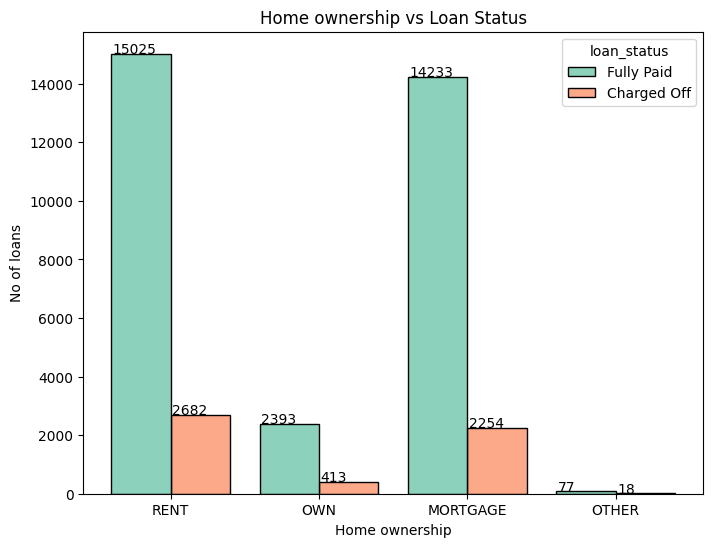

In [83]:
#Hist of Home Ownership vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)

sns.histplot(data=df_final, x="home_ownership", hue="loan_status", 
             multiple="dodge", shrink=.8,
             palette = "Set2")
    
ax.set_xlabel('Home ownership')
ax.set_ylabel('No of loans')

ax.set_title('Home ownership vs Loan Status')

label(ax,0.01)


- Rent and Mortage category people take maximum loans and have higher chances of being defaulters of the loan compared with people in Own house 

**Verification vs Loan Staus**

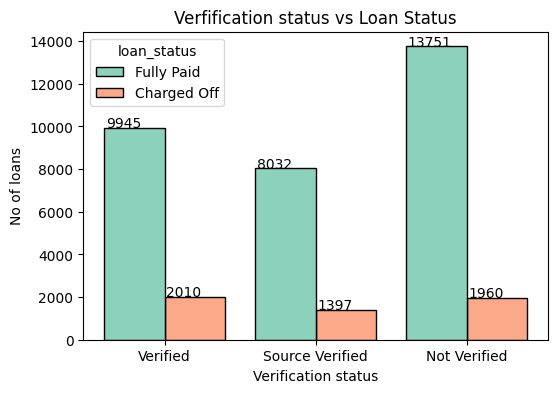

In [84]:
#Histplot of Verification vs Loan Status
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.histplot(data=df_final, x="verification_status", hue="loan_status", 
             multiple="dodge", shrink=.8,
             palette = "Set2")
    
ax.set_xlabel('Verification status')
ax.set_ylabel('No of loans')

ax.set_title('Verfification status vs Loan Status')
label(ax,0.01)

plt.show()


- Verified loans which are Charged Off is more compared to Not Verified


**State vs Loan Staus**

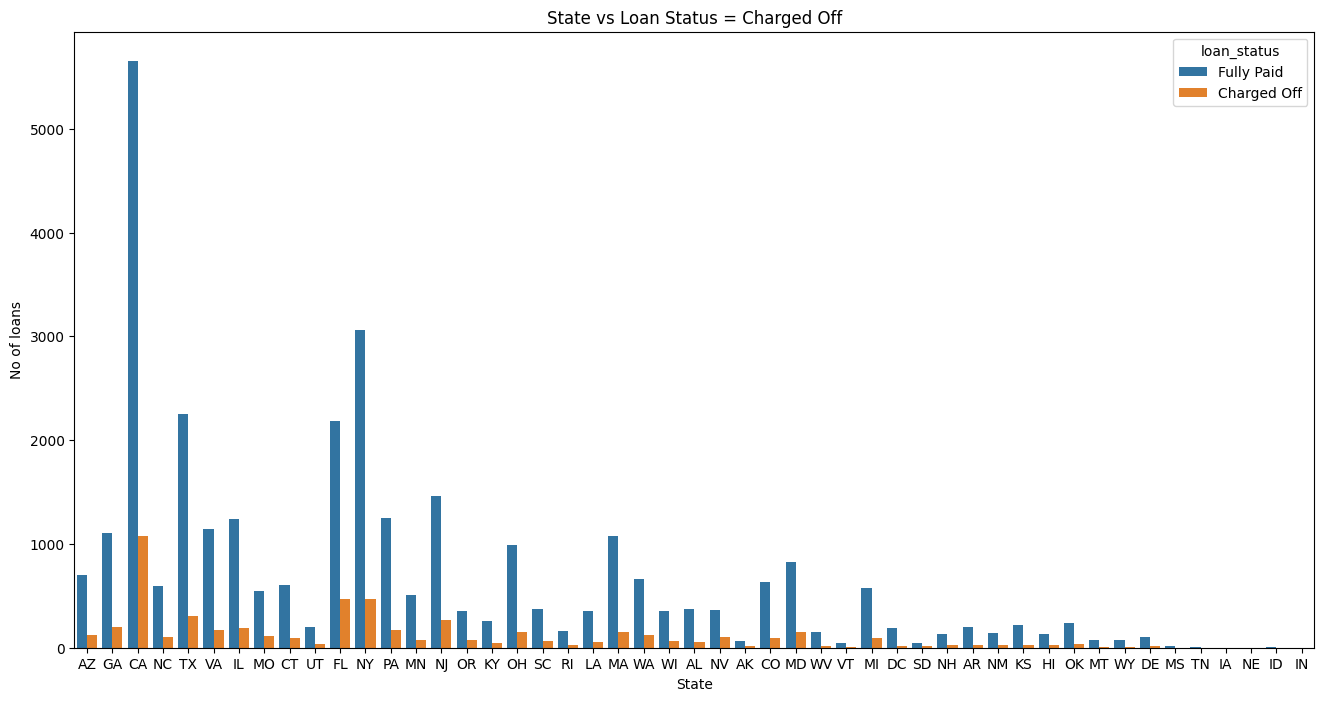

In [85]:
#Countplot of State vs Loan Status
fig, ax = plt.subplots(figsize=(16,8)  , dpi=100)

sns.countplot(x='addr_state',  hue="loan_status",
              data=df_final)

ax.set_xlabel('State')
ax.set_ylabel('No of loans')

ax.set_title('State vs Loan Status = Charged Off')

plt.show()



- Borrowers from states CA, FL, NY and NJ have failed to pay the loan

**Grade vs Loan status**

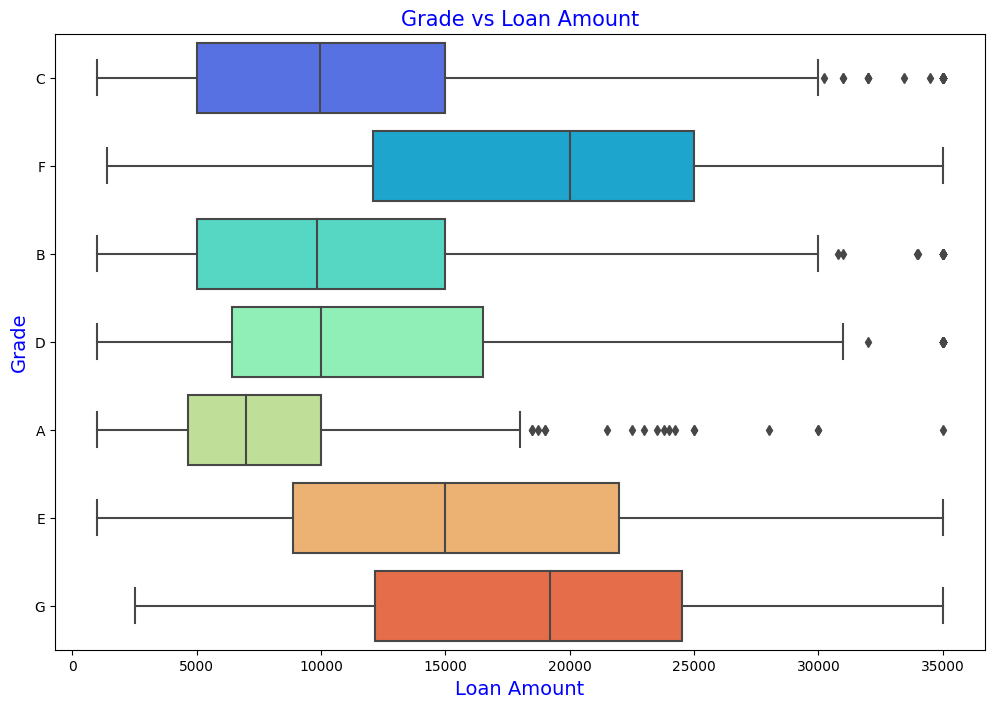

In [86]:
#Boxplot Grade vs Loan status
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='grade', x='loan_amnt', data =df_final[df_final.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Grade vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Grade',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()




- Grade F, G and E are the three category which has higher charged off
- The median of F and G is around 20k and Q3 at 25k
- Grade A has a median at 7.5k and is at the least


**DTI vs Loan status**

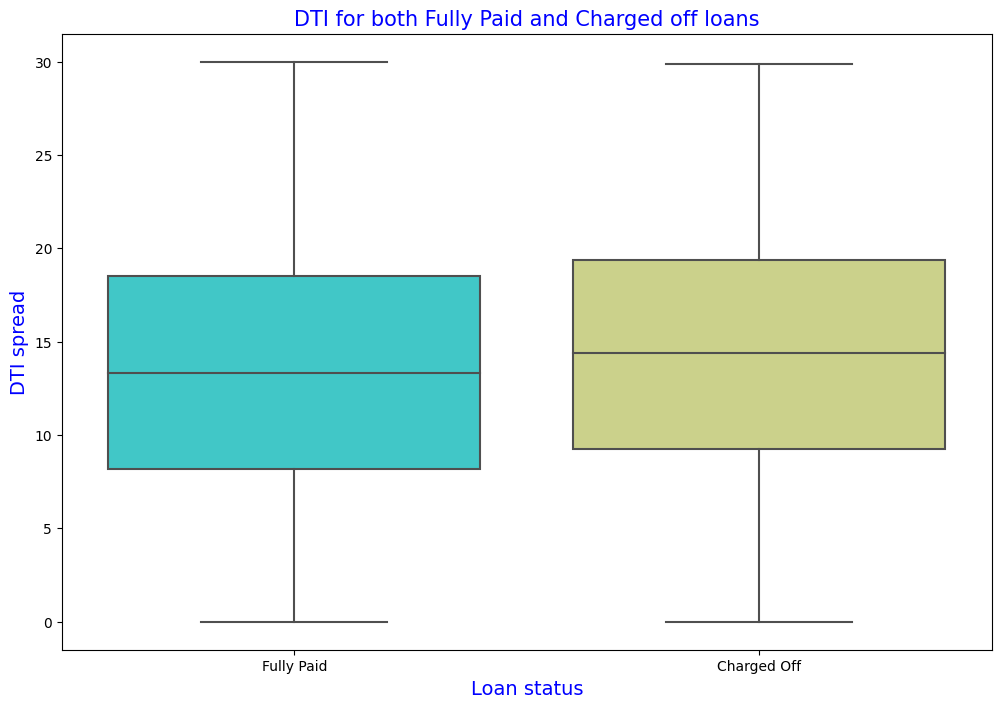

In [87]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='dti', x='loan_status', data =df_final,palette='rainbow')
ax.set_title('DTI for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('DTI spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()



- DTI is not a significant factor because the median is close to each other for Fully Paid and Charged Off

**amnt_to_inc_ratio vs Loan status**


In [88]:
df_final["amnt_to_inc_ratio"] = df_final.loan_amnt/df_final.annual_inc
df_final[["loan_amnt", "annual_inc","amnt_to_inc_ratio"]]

,loan_amnt,annual_inc,amnt_to_inc_ratio
0,5000,24000,0.208333
1,2500,30000,0.083333
3,10000,49200,0.203252
5,5000,36000,0.138889
6,7000,47004,0.148923
...,...,...,...
39562,4800,35000,0.137143
39573,7000,63500,0.110236
39623,9000,39000,0.230769
39666,15450,40000,0.386250


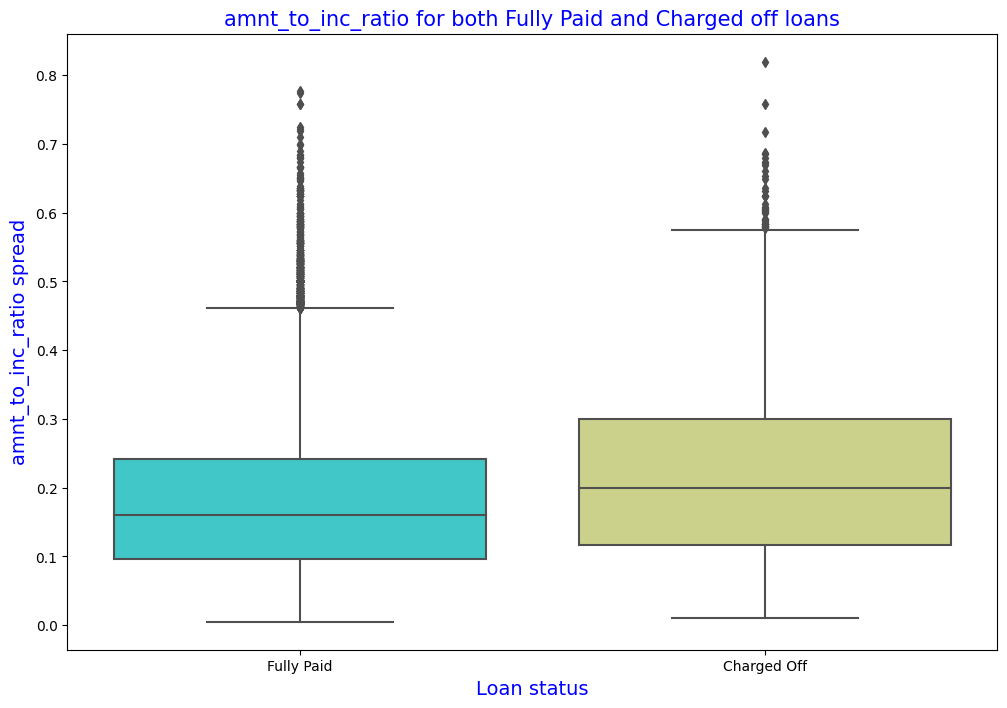

In [89]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='amnt_to_inc_ratio', x='loan_status', data =df_final,palette='rainbow')
ax.set_title('amnt_to_inc_ratio for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('amnt_to_inc_ratio spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()


### Observation from the Bivariant Analysis

- Amnt_to_int_ratio is an indicator of bad loans as for charged off the median and Q3 is higher 
- DTI is not a significant factor because the median is close to each other for Fully Paid and Charged Off
- Grade F, G and E are the three category which has higher charged off
- The median of F and G is around 20k and Q3 at 25k
- Grade A has a median at 7.5k and is at the least
- Borrowers from states CA, FL, NY and NJ have failed to pay the loan
- Verified loans which are Charged Off is more compared to Not Verified
- Rent and Mortage category people take maximum loans and have higher chances of being defaulters of the loan compared with people in Own house 
-  Loans with purpose debt consolidation, other, credit crd and home improvement categories are unable to pay the loan compared with education / renewable energy
- Also debt consolidation is the category where maximum loans are given.
- high loans are Charged Off for the loans issued in Sep - Dec months
- Plot of loan issue year shows maximum loans were taken in the year 2011
- Also high loans are being Charged Off in 2011
- Maximum loans are issued for people having 10 years of emp_lenth and hence the no. of defaulters are also high

**Analysing Correlation Matrix in the data**

<Axes: >

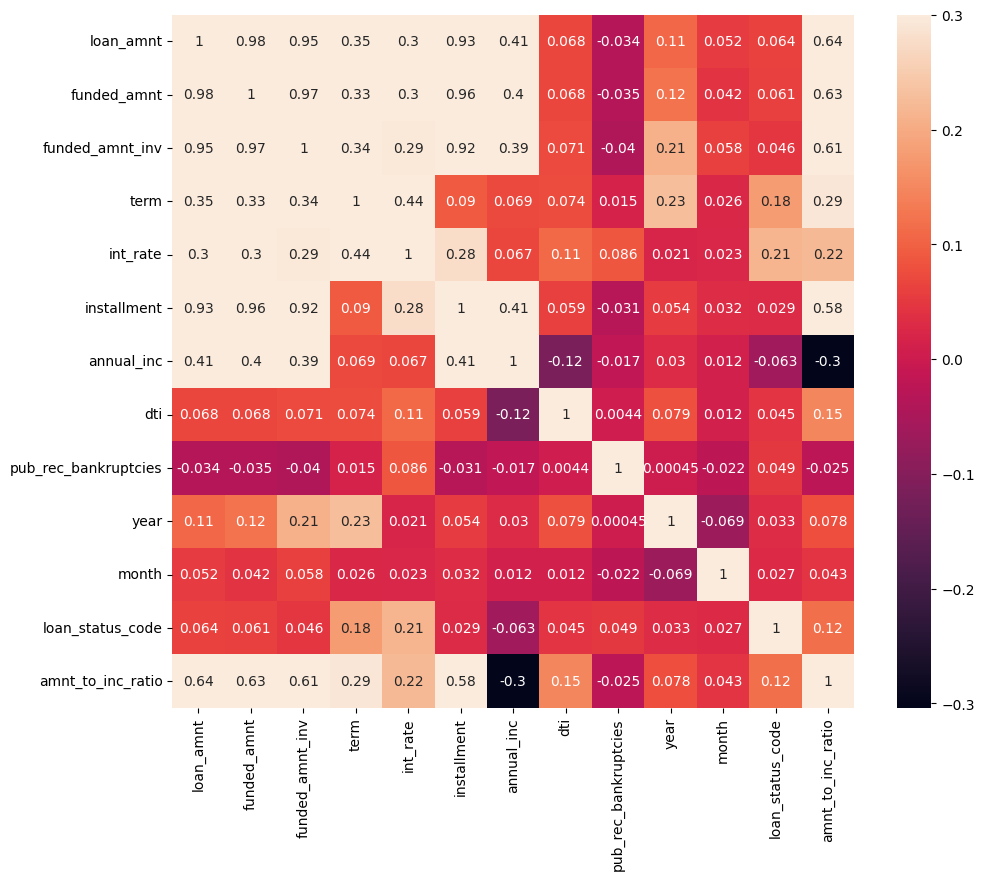

In [90]:
#To identify correlation between all variables of the dataset and see which variables are negativey impacting loan_status variable
f, ax = plt.subplots(figsize=(11, 9))
corr = df_final.corr()
sns.heatmap(corr,  vmax=.3, annot=True)

# Summary

**Above plots is for charged off loans.A Applicant is more likely to default if:**
 
>- Though 36 month loan default is more compared to 60 month 
>- What is observed is if we see the % of charged off in 36 months it would be 10% of the total loans of 36 months tenure.
>- Also if we calculate % charged off in 60 months it is 25% of the total loans issued with a 60 months which is much higher as compared to 36 month tenure so it is more likely for a 60 months loan issued to be a default
>-  Loans with purpose debt consolidation, other, credit crd and home improvement categories are unable to pay the loan compared with education / renewable energy
>- Also debt consolidation is the category where maximum loans are given.
>- Rent and Mortage category people take maximum loans and have higher chances of being defaulters of the loan compared with people in Own house 
>- Verified loans which are Charged Off is more compared to Not Verified
>- Borrowers from states CA, FL, NY and NJ have failed to pay the loan
>- Grade F, G and E are the three category which has higher charged off
>- The median of F and G is around 20k and Q3 at 25k
>- Grade A has a median at 7.5k and is at the least
>- DTI is not a significant factor because the median is close to each other for Fully Paid and Charged Off
>- Amnt_to_int_ratio is an indicator of bad loans as for charged off the median and Q3 is higher
>- Correlation graph shows variables annaul_inc, installment, issue_m, amnt_to_inc_ratio, loan_amt, funded_amt, issue_y have negative impact on the loan_status variable

# RECOMMENDATIONS:

- Lending club should reduce the high interest loans for 60 months tenure, they are prone to loan default. 
<br>

- Small business loans are defaulted more. Lending club should cautiously give the loans to them.
<br>

- Borrowers with mortgage home ownership are taking higher loans and defaulting the approved
  loans. High Alert for Lending club when loan amount asked is 12000 or more.
  <br>
  
- Charging an Interest rate ranging between 21-25% can lead to a list of defaulters so we can minimize giving loans to the      profile on which interest rate is calculated high.
<br>
  
- Grades can be one of the indicator for detecting defaulters. 
<br>

- Lending Club should keep a check to the number of loan issues to borrowers who are from CA, FL and NY to avoid risks.